In [21]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#  Load ECG Dataset

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


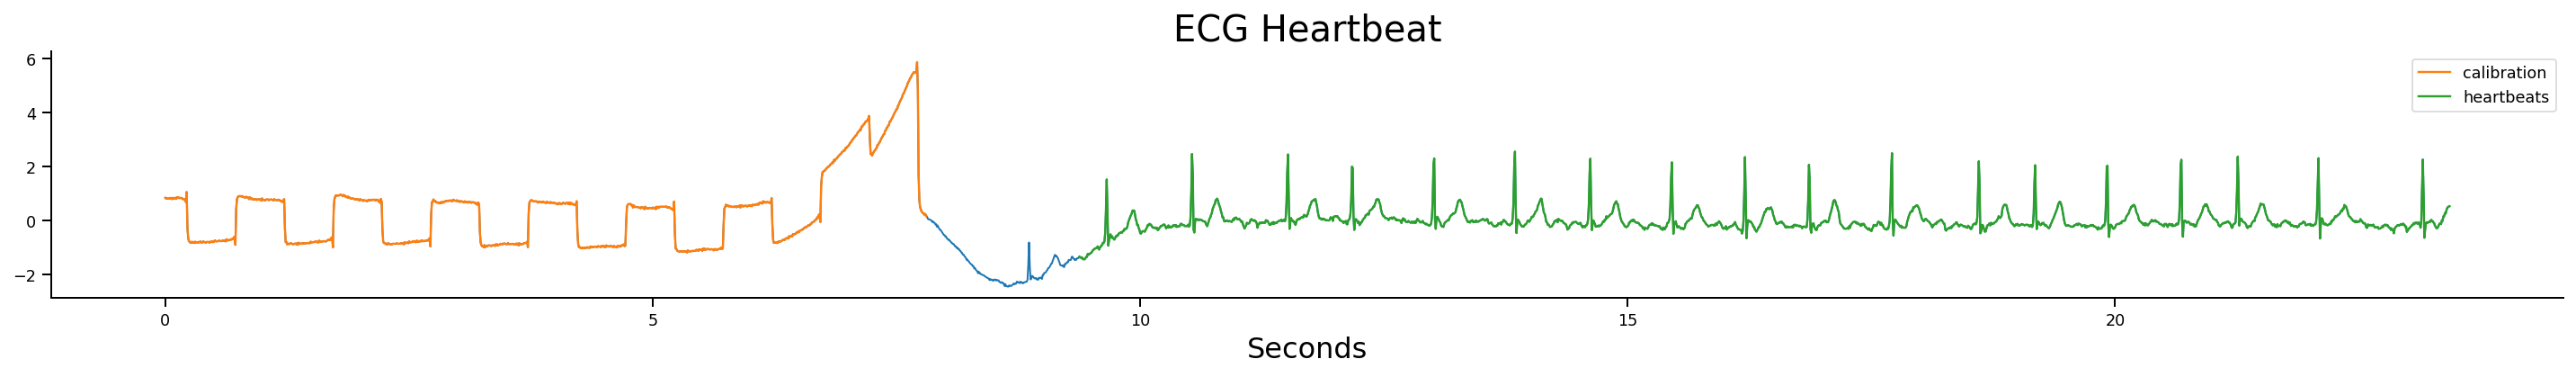

In [22]:
ds_name = "ECG Heartbeat"
file = 'ecg-heartbeat-av.csv'
series, df_gt = ml.read_dataset_with_index(file)
data = series.values
#series = ml.as_series(data, np.arange(0, 3000, 1) / 128, 'Seconds')
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

In [23]:
#path = os.getcwd() + '/../datasets/ground_truth/' + file.split(".")[0]+".csv"
#series.to_csv(path)
#path = os.getcwd() + '/../datasets/ground_truth/' + file.split(".")[0]+"_gt.csv"
#df_gt.to_csv(path)

# Parameters

In [24]:
df = pd.DataFrame() # TOP-1
df2 = pd.DataFrame() # TOP-2
df_comp = pd.DataFrame(columns=["Method", "Motif", "Extent", "k"]) # Complete Info

rerun_all_jars = False
motif_length = 125
dataset = os.getcwd() + '/../datasets/' + file
print(dataset)

/Users/bzcschae/workspace/motiflets_paper/notebooks/../datasets/ecg-heartbeat-av.csv


# k-Motiflets

Compute ks: 100%|██████████| 18/18 [00:01<00:00, 17.82it/s]


Chosen window-size: 125


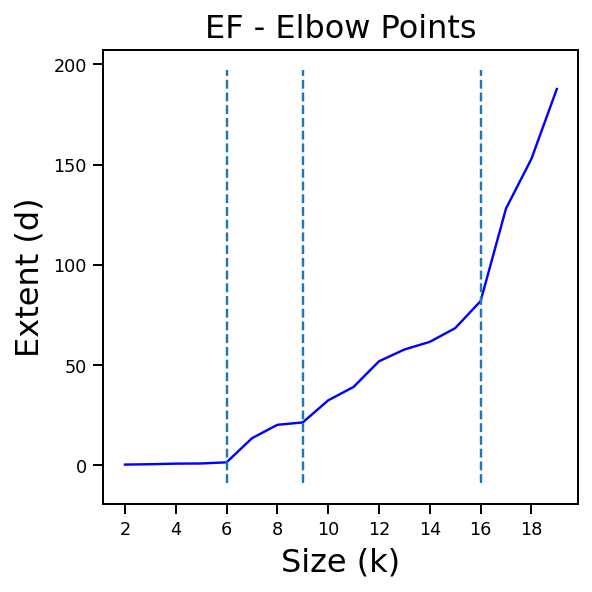

Identified Elbow Points [ 6  9 16]
Filtered Elbow Points [6, 16]


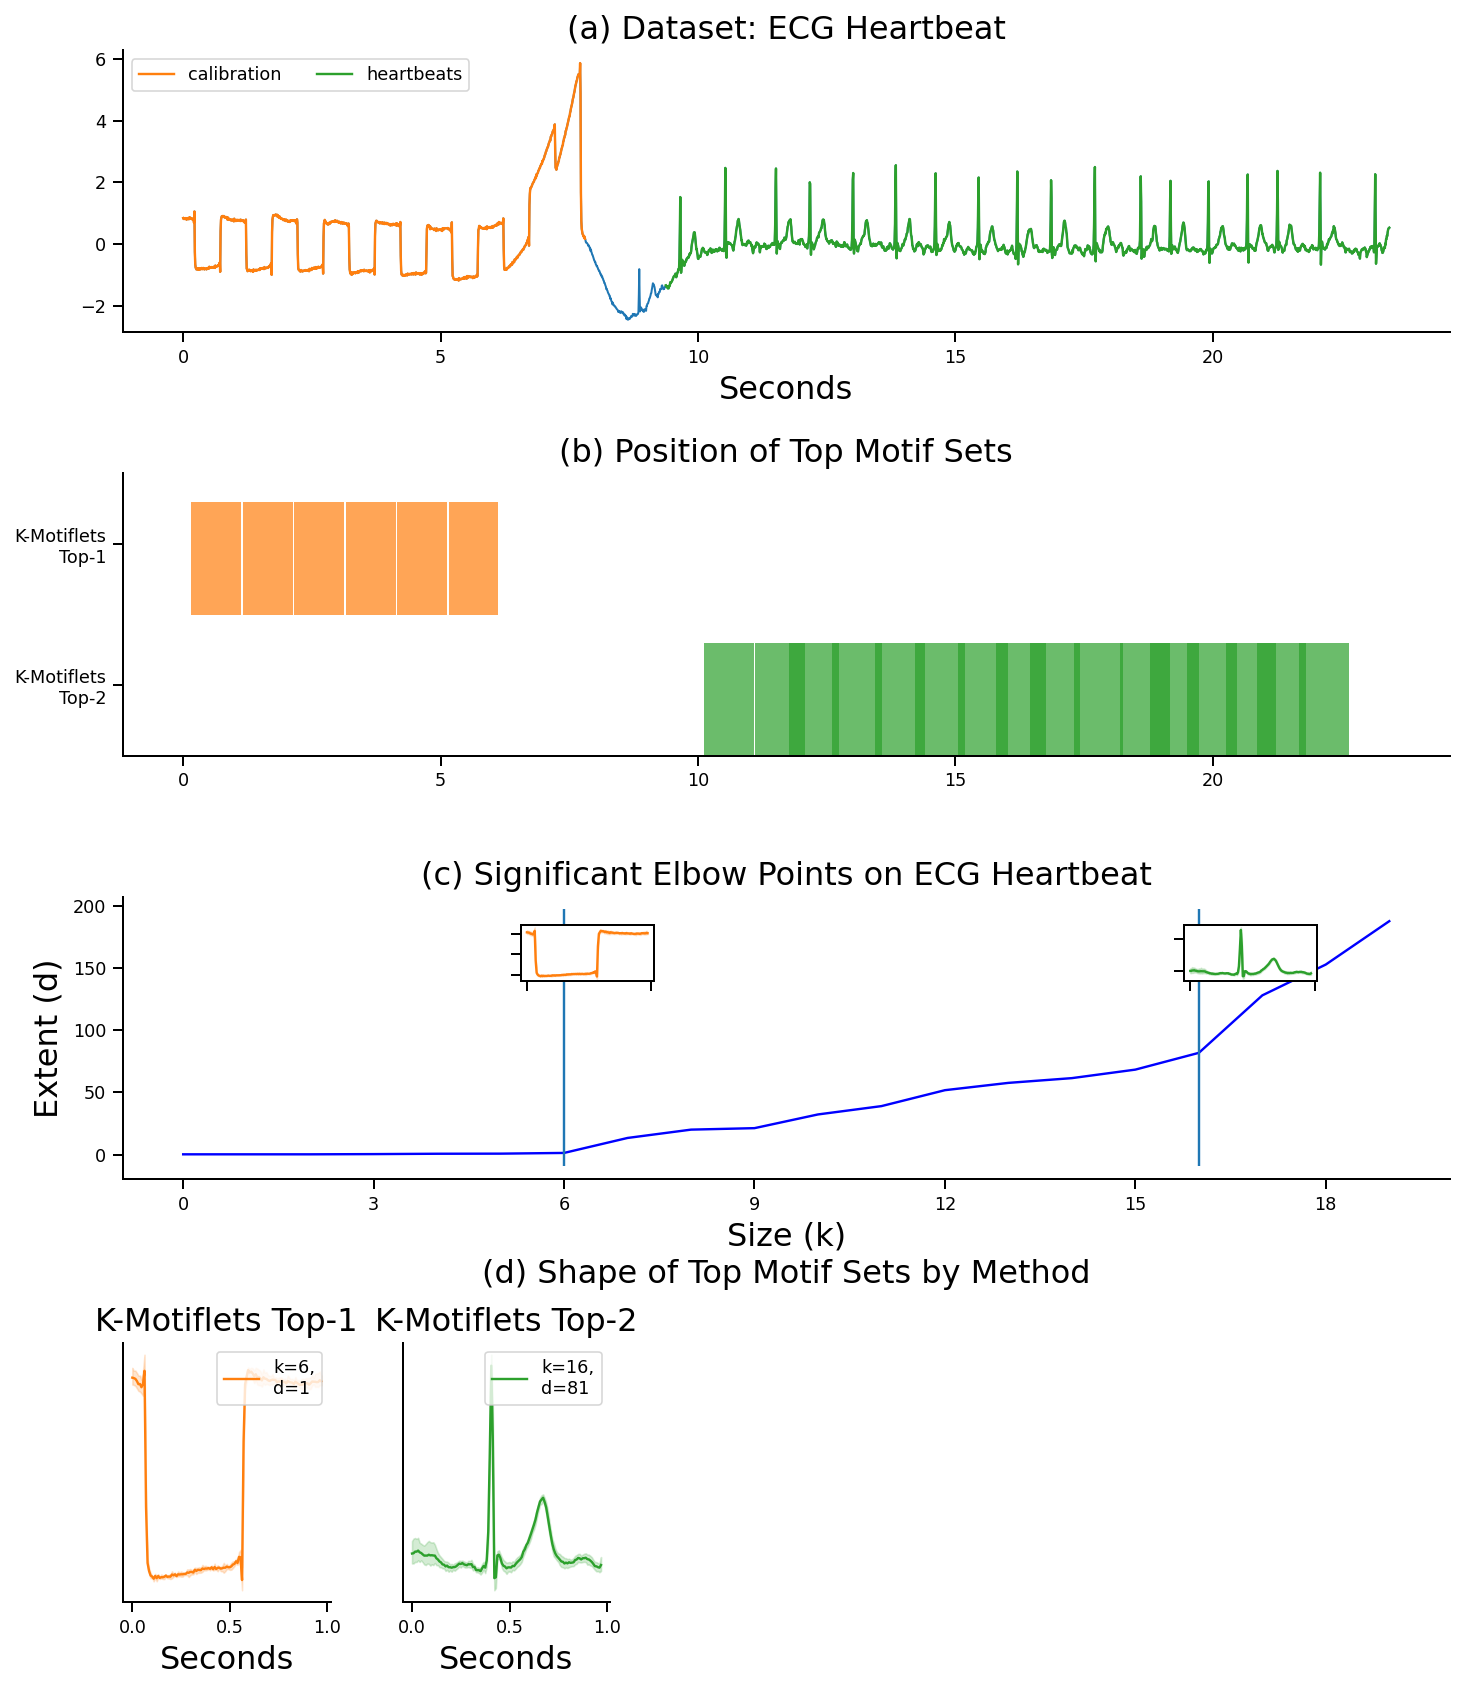

In [25]:
dists, motiflets, elbow_points = plot_elbow(
    20, series, file, ds_name=ds_name, plot_elbows=True,
    motif_length=motif_length, method_name="K-Motiflets", ground_truth=df_gt)

In [26]:
D_full = ml.compute_distances_full(data, motif_length)

df["Motiflets Top-1"] = [motiflets[elbow_points[-1]]]
df2["Motiflets Top-2"] = [motiflets[elbow_points[-2]]]
df_comp = append_all_motif_sets(df_comp, motiflets, "Motiflets", D_full)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [27]:
max_r = 40
radii = np.arange(1, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/set_finder.jar',
       dataset,
       'SetFinder',
       str(list(radii)),
       str(motif_length)])

Radii [ 1  5  9 13 17 21 25 29 33 37]


r: 0.9798815 d: 1.7710949182510376
r: 1.0362344 d: 1.7337895631790161
r: 8.530917 d: 13.68565845489502
r: 12.568304 d: 26.922367095947266
r: 16.256914 d: 36.55889892578125
r: 20.652122 d: 36.289058685302734
r: 24.519466 d: 54.18132019042969
r: 24.519466 d: 54.18132019042969
Filtered Elbow Points [0, 1, 5]


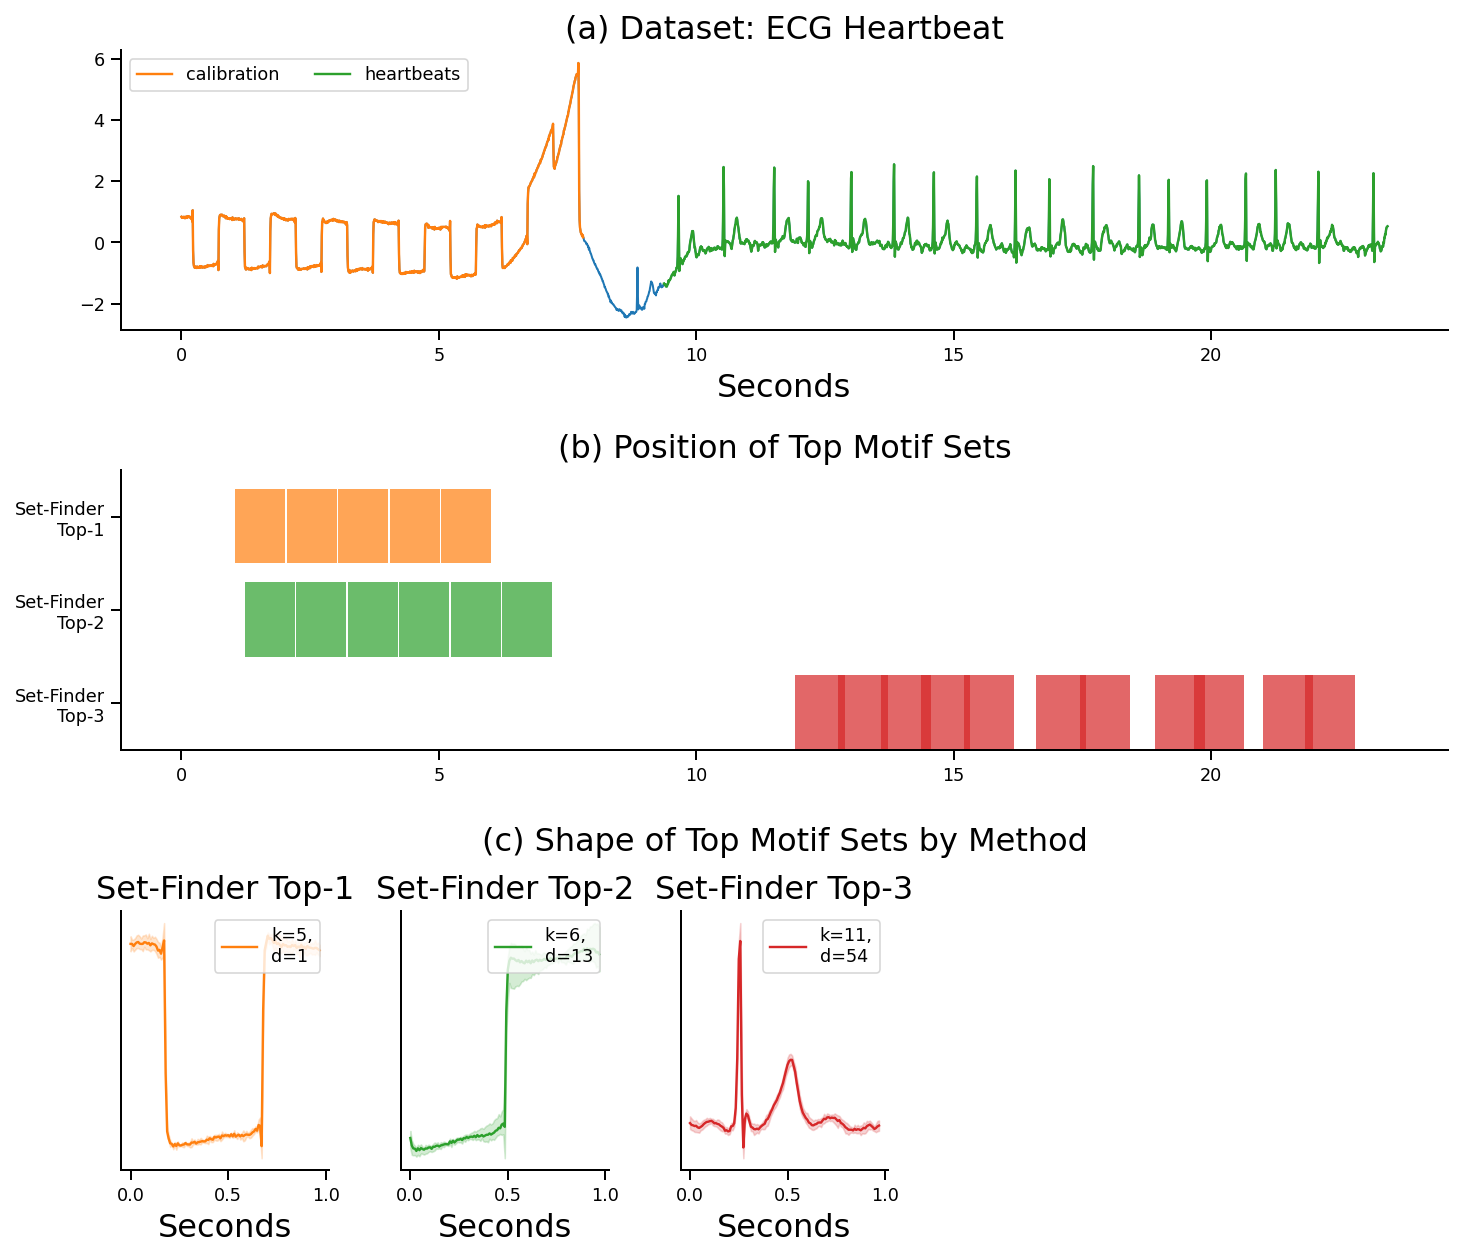

In [28]:
# run jave code first       
ms_set_finder = [
	[390, 134, 262, 518, 646],
	[414, 158, 286, 542, 670],
	[671, 158, 286, 414, 542, 798],
	[1621, 1727, 1826, 1933, 2114, 2222, 2505],
	[1622, 1515, 1728, 1827, 1934, 2115, 2223, 2506, 2783],
	[2507, 1431, 1516, 1623, 1729, 1828, 1935, 2116, 2224, 2784],
	[1633, 1526, 1739, 1838, 1945, 2126, 2234, 2422, 2517, 2689, 2794],
	[1633, 1526, 1739, 1838, 1945, 2126, 2234, 2422, 2517, 2689, 2794],
#	[1614, 1422, 1507, 1720, 1819, 1926, 2022, 2107, 2215, 2330, 2498, 2595, 2775],
]

motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length,
                            prefix="Set-Finder", ground_truth=df_gt)
    
df["Set Finder Top-1"] = [motifset[-1]]
df2["Set Finder Top-2"] = [motifset[-3]]
df_comp = append_all_motif_sets(df_comp, ms_set_finder, "Set Finder", D_full)

# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [29]:
max_r = 50
radii = np.arange(10, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/emma.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [10 15 20 25 30 35 40 45 50]


r: 1.5729595 d: 1.572959542274475
r: 1.3041965 d: 1.7337895631790161
r: 12.699535 d: 13.68565845489502
r: 16.84656 d: 17.985429763793945
r: 21.385527 d: 22.948118209838867
r: 37.84346 d: 70.06629943847656
r: 45.39357 d: 70.88336181640625
r: 59.47456 d: 78.62164306640625
Filtered Elbow Points [0, 1, 2]


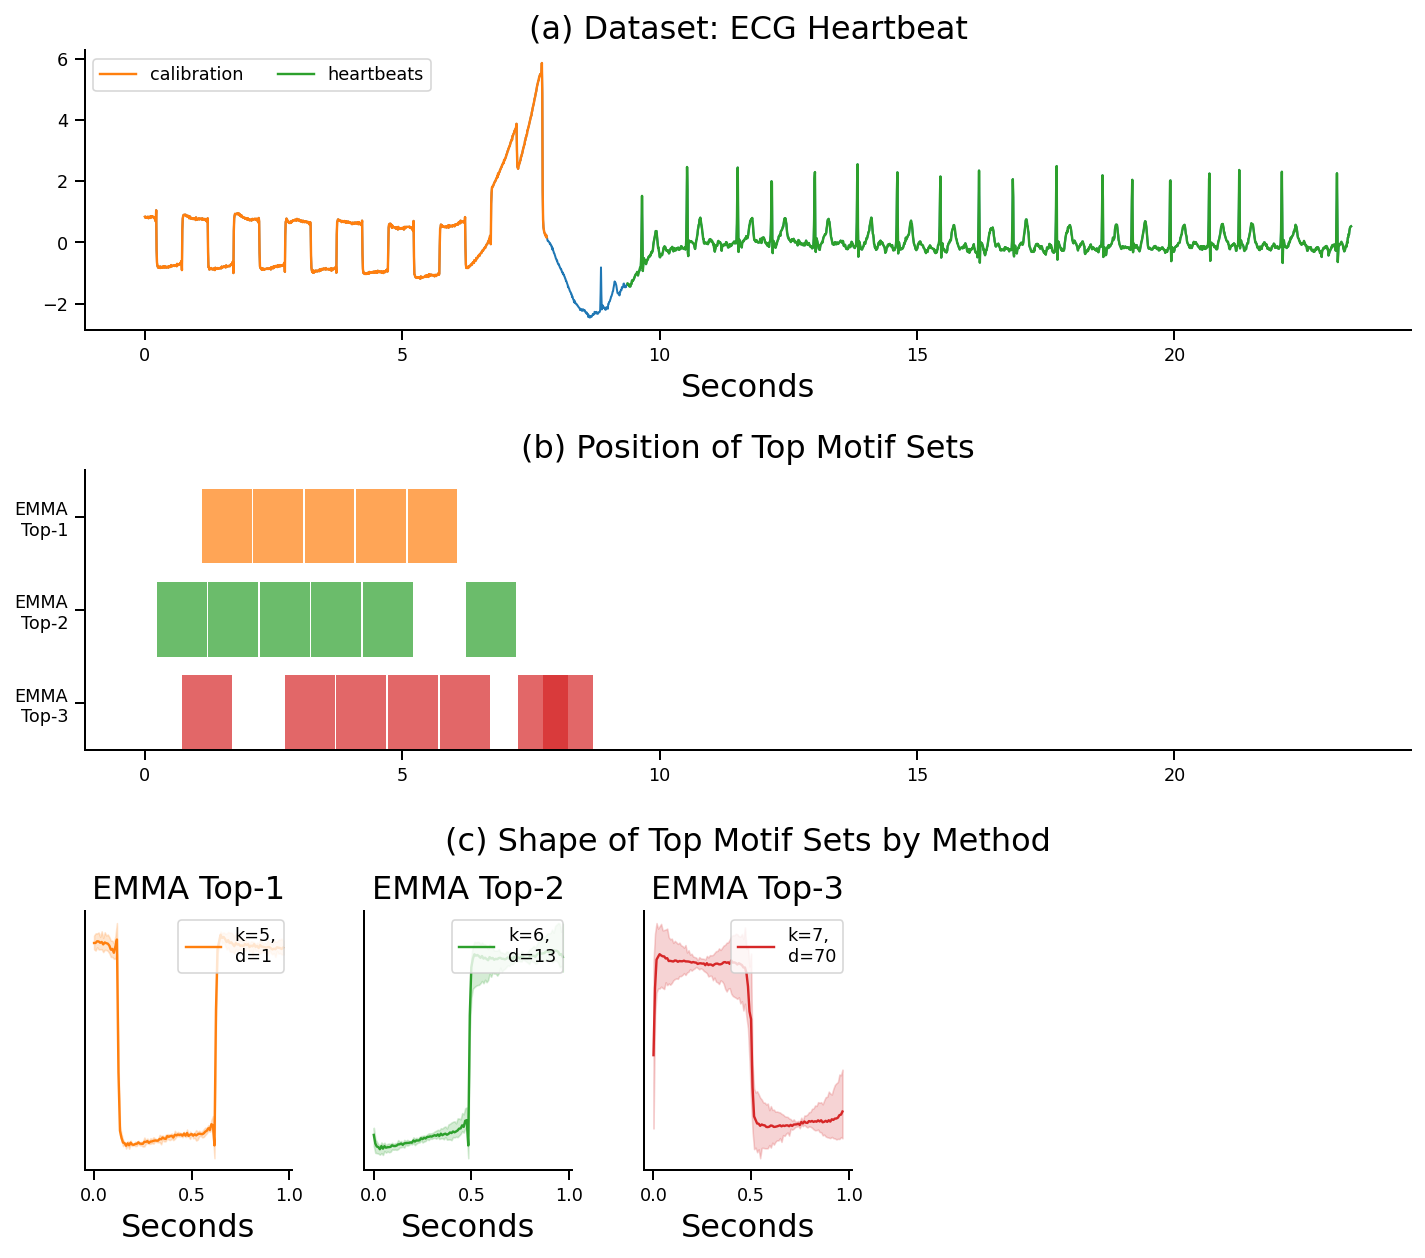

In [30]:
# run jave code first       
ms_emma = [
	[141, 269, 397, 525, 653],
	[30, 158, 286, 542, 670],
	[30, 158, 286, 414, 542, 798],
	[29, 157, 285, 413, 541, 795],
	[23, 151, 279, 407, 536, 790],
	[92, 348, 476, 604, 734, 927, 991],
	[219, 347, 475, 603, 734, 926, 990],
#	[91, 219, 475, 603, 734, 926, 990],
#	[90, 218, 474, 602, 733, 924, 990],
	[90, 346, 474, 602, 733, 925, 989],
]

motifset = plot_competitors(series, ds_name, ms_emma, motif_length, prefix="EMMA", ground_truth=df_gt)

df["EMMA Top-1"] = [motifset[-1]]
df2["EMMA Top-2"] = [motifset[-3]]
df_comp = append_all_motif_sets(df_comp, ms_emma, "EMMA", D_full)

# Valmod Motif Sets
based on own (fixed-length) implementation

r: 0.18837197 d: 0.18837197124958038
r: 0.5358879 d: 0.9373919367790222
r: 24.987986 d: 25.980228424072266
r: 66.50374 d: 97.07827758789062
Filtered Elbow Points [3]


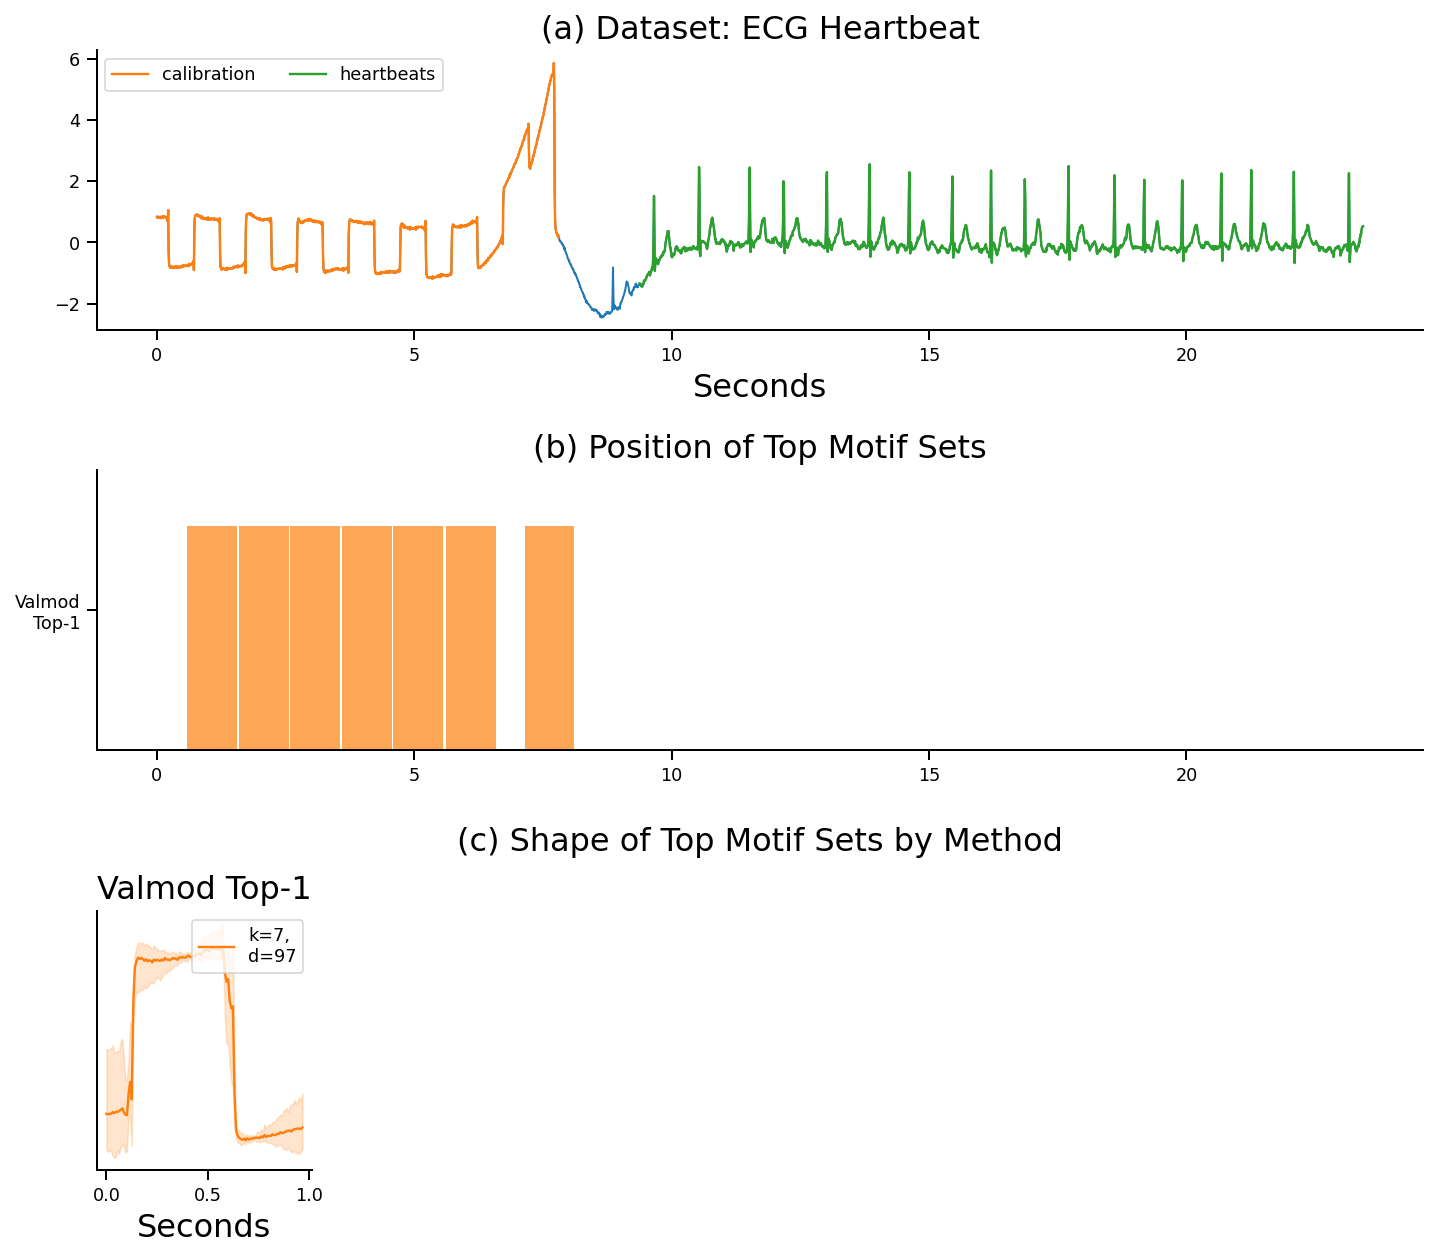

In [31]:
max_r = 80

data_raw = data.to_numpy() if isinstance(data, pd.Series) else data    
ms_valmod = [motifset for (motifset, _) in get_valmod_motif_set_ranged(data_raw, file, motif_length, max_r)]
motifset = plot_competitors(series, ds_name, ms_valmod, motif_length, prefix="Valmod", ground_truth=df_gt)

df["VALMOD Top-1"] = [motifset[-1]]
df2["VALMOD Top-2"] = [ms_valmod[-3]]
df_comp = append_all_motif_sets(df_comp, ms_valmod, "VALMOD", D_full)

# Learning Motifs
See Java Code

In [32]:
max_r = 50
radii = np.arange(1, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/latent_motifs.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [ 1  6 11 16 21 26 31 36 41 46]


r: 1.3041965 d: 1.7337895631790161
r: 19.560358 d: 20.747102737426758
r: 22.461767 d: 35.759002685546875
r: 41.06542 d: 41.0654182434082
r: 84.420235 d: 84.42023468017578
Filtered Elbow Points [0, 4]


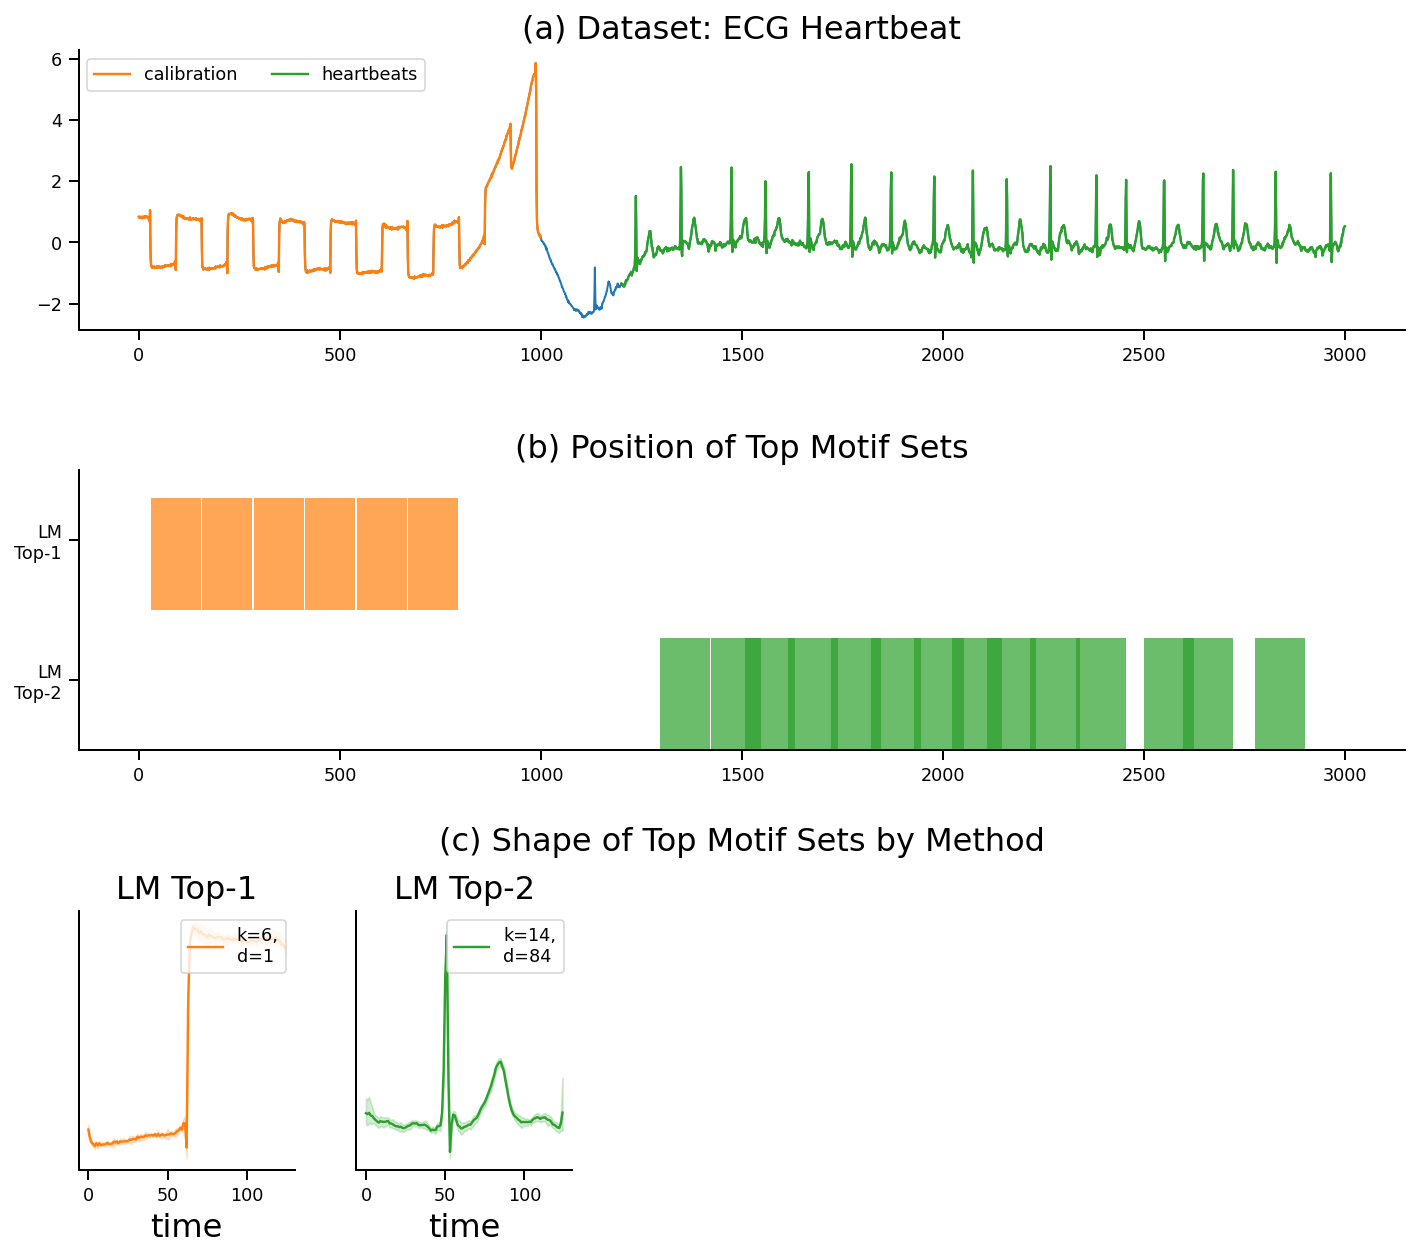

In [33]:
ms_learning_motifs = np.array([
	[30,158,286,414,542,670,],
	[1427,1619,1725,1824,1931,2220,2503,2780,],
	[1525,1632,1738,1837,1944,2125,2233,2421,2516,2793,],
	[1308,1433,1518,1625,1731,1830,1937,2118,2226,2509,2786,],
#	[1298,1423,1615,1721,1820,1927,2023,2108,2216,2330,2499,2596,2776,],
#	[1298,1423,1508,1615,1721,1820,1927,2023,2108,2216,2330,2499,2596,2776,],
	[1297,1423,1508,1615,1721,1820,1927,2023,2108,2216,2330,2499,2596,2776,],
#	[1283,1409,1494,1601,1707,1806,1913,2094,2202,2316,2485,2582,2762,],
#	[1283,1409,1494,1600,1707,1806,1913,2009,2094,2202,2316,2485,2582,2762,],
])
    
motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, prefix="LM", ground_truth=df_gt)

df["LM Top-1"] = [motifset[-1]]
df2["LM Top-2"] = [motifset[-2]]
df_comp = append_all_motif_sets(df_comp, ms_learning_motifs, "LM", D_full)

# Comparison

In [34]:
df_all = (pd.concat([df, df2], axis=1)).T
df_all.rename(columns={0:"offsets"}, inplace=True)
df_all

,offsets
Motiflets Top-1,"[2329, 2497, 1422, 1613, 2106, 1926, 2594, 129..."
Set Finder Top-1,"[1633, 1526, 1739, 1838, 1945, 2126, 2234, 242..."
EMMA Top-1,"[92, 348, 476, 604, 734, 927, 991]"
VALMOD Top-1,"[76, 204, 332, 460, 588, 719, 914]"
LM Top-1,"[1297, 1423, 1508, 1615, 1721, 1820, 1927, 202..."
Motiflets Top-2,"[20, 148, 404, 532, 276, 660]"
Set Finder Top-2,"[390, 134, 262, 518, 646]"
EMMA Top-2,"[141, 269, 397, 525, 653]"
VALMOD Top-2,"[82, 210, 338, 466, 594]"
LM Top-2,"[30, 158, 286, 414, 542, 670]"


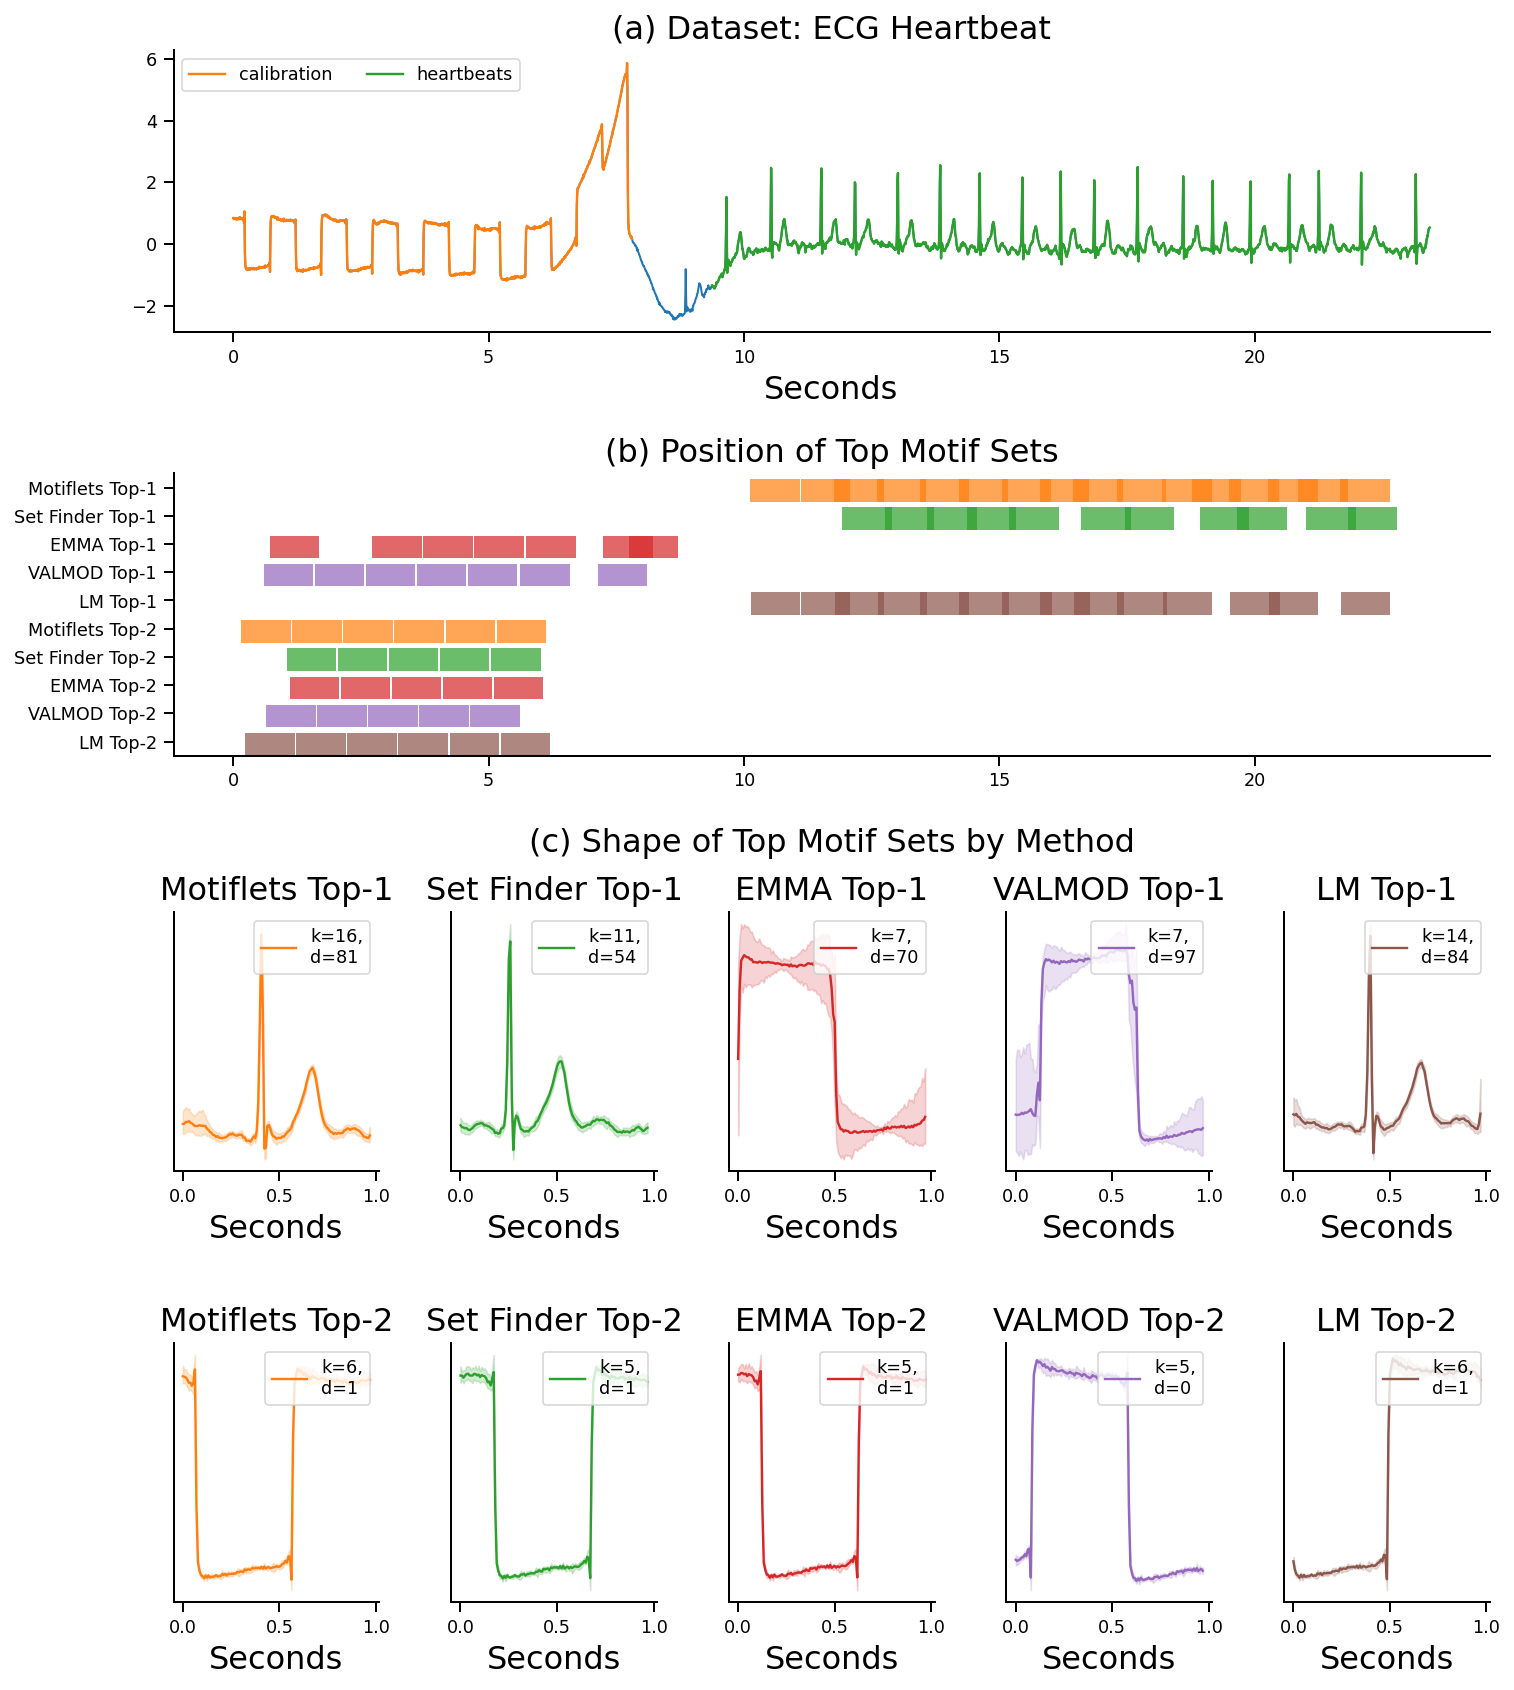

In [35]:
motifsets = np.array(df_all["offsets"].values)
plot_all_competitors(series, ds_name, motifsets, motif_length, 
                     method_names=df_all.index.values, ground_truth=df_gt)            

# Summary

In [36]:
df_2 = df.T
df_2.rename(columns={0:"offsets"}, inplace=True)
df_2

,offsets
Motiflets Top-1,"[2329, 2497, 1422, 1613, 2106, 1926, 2594, 129..."
Set Finder Top-1,"[1633, 1526, 1739, 1838, 1945, 2126, 2234, 242..."
EMMA Top-1,"[92, 348, 476, 604, 734, 927, 991]"
VALMOD Top-1,"[76, 204, 332, 460, 588, 719, 914]"
LM Top-1,"[1297, 1423, 1508, 1615, 1721, 1820, 1927, 202..."


In [37]:
extent = [ml.get_pairwise_extent(D_full, df_2.offsets[ind]) for ind in df_2.index]
count = [len(df_2.offsets[ind]) for ind in df_2.index]

df_statistics = pd.DataFrame(
    data=zip(df_2.index, extent, count), 
    columns=["Method", "Extent (d)", "Size (k)"])
df_statistics["Dataset"] = ds_name
# df_statistics.set_index("Method", inplace=True)
display(df_statistics)

,Method,Extent (d),Size (k),Dataset
0,Motiflets Top-1,81.794182,16,ECG Heartbeat
1,Set Finder Top-1,54.181320,11,ECG Heartbeat
2,EMMA Top-1,70.066299,7,ECG Heartbeat
3,VALMOD Top-1,97.078278,7,ECG Heartbeat
4,LM Top-1,84.420235,14,ECG Heartbeat


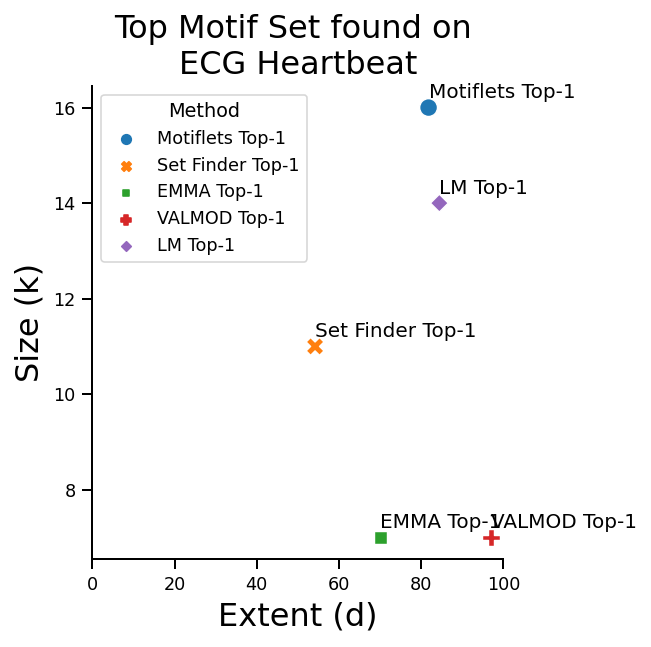

In [38]:
def annotate(ax, df):
    for ix, method, extent, cardinality, _ in df.itertuples():
        ax.annotate(
            method,
            (extent, cardinality+0.2),
            size = 10
        )

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_statistics, 
                x="Extent (d)", y="Size (k)", hue="Method", 
                style="Method", s=80, ax=ax)
annotate(ax, df_statistics)
ax.set_title("Top Motif Set found on \n"+ ds_name)
ax.set_xlim([0,100])
ax.set_ylabel("Size (k)")
ax.set_xlabel("Extent (d)")
sns.despine()
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
# plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare.pdf", bbox_inches='tight')

# Compare Relationship between size and extent

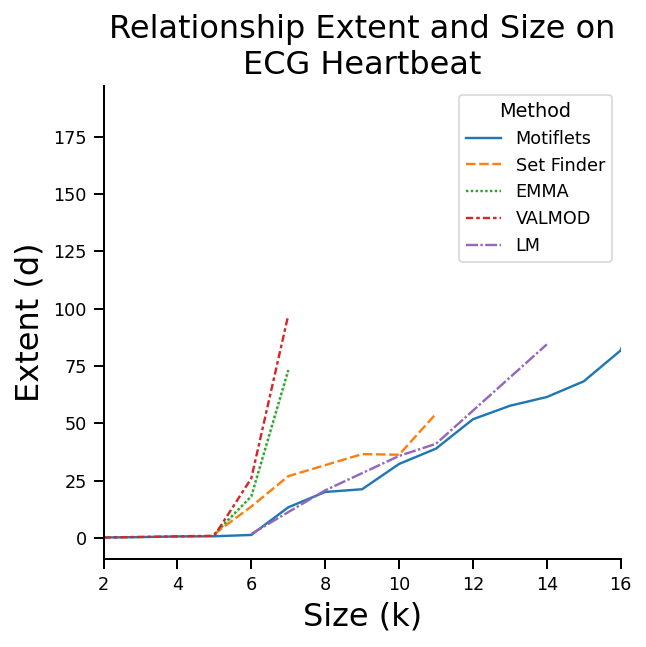

In [39]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Relationship Extent and Size on\n" + ds_name)
sns.lineplot(x="k", y="Extent", data=df_comp, hue="Method", style="Method", ci=0)
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim([2,16])
ax.set_xlabel("Size (k)")
ax.set_ylabel("Extent (d)")
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
# plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare2.pdf", bbox_inches='tight')